In [1]:
import gym

# Trading Framework

This framework is developed based on Tito Ingargiola's amazing work on https://github.com/hackthemarket/gym-trading. 

In [2]:
import gym_trading
from gym_trading.envs.Q_learning import Q

ImportError: No module named gym_trading


First, define the address for the CSV data


In [3]:
csv = "/home/adrian/Escritorio/polinex/LTCBTC.csv"
csv2 = "/home/adrian/Escritorio/polinex/EURUSD60.csv"

# Create a new OpenAI Gym environment with the customised Trading environment



 .initialise_simulator() must be invoked after **env.make('trading-v0')** . Within this function, provide these arguments:


* **csv**: Address of the data


* **ATR**: True/ False, (The only indicator available now)



* **trade_period**: (1 - 10), Holding period for each trades. *Default: 1*


* **train_split**: (0.0,1.0), Percentage of data set for training. *Default: 0.7*

In [4]:
env = gym.make('trading-v0')
env.initialise_simulator(csv2, ATR=True, trade_period=5, train_split=0.7)

[2017-07-01 19:52:41,462] Making new env: trading-v0


Please invoke .initialise_simulator() method next to complete initialization


# States map

states_map is a discretized observation space bounded by the extreme values Return and ATR, with an interval of 0.5. For every new observation (Return, ATR) tuple pair, it is approximated to the closest pair on states_map. States_map corresponds to the row index of lookup_table

In [5]:
env.sim.states

array([[ 0.42030356,  0.35514246],
       [ 1.70795341,  0.45689009],
       [-0.59244737,  0.45925152],
       ..., 
       [-1.00088407, -0.45976391],
       [-0.20194948, -0.51999441],
       [ 0.31364588, -0.61636501]])

# Next, Create Q_learning framework

This framework wraps around the trading environment.

Arguments:

* **env**: gym_trading Environment

* **train_episodes**: Number of train episodes to update Q_table

* **learning_rate**: *Default: 0.2*

* **gamma**: *Default: 0.9* 

    Upon initializing, Q_learning has zeroed Q_table **lookup_table** and **states_map**
    
 


In [6]:
Q_learning = Q(env, train_episodes=1000, learning_rate=0.2, gamma=0.9)

# States_map
**states_map** is a discretized observation space bounded by the extreme values *Return* and *ATR*, with an interval of 0.5.
For every new observation *(Return, ATR) tuple pair*, it is approximated to the closest pair on **states_map**.  **States_map** corresponds to the row index of **lookup_table**


In [7]:
Q_learning.states_map

array([[-10. ,  -3. ],
       [-10. ,  -2.5],
       [-10. ,  -2. ],
       ..., 
       [ 10. ,   3. ],
       [ 10. ,   3.5],
       [ 10. ,   4. ]])

# Q Table
**lookup_table** has row size the length of **states_map** and column size of 3 (actions (0,1,2).).

In [8]:
Q_learning.lookup_table[Q_learning.lookup_table!=0]

array([], dtype=float64)

All zero now, not trained yet

# Training

Filling up the Q Table

In [9]:
Q_learning.train()

Training period  2013-12-02 02:00:00 - 2014-04-08 19:00:00
End of Episode 1, Reward is -3.30075376884
End of Episode 2, Reward is -4.01862745098
End of Episode 3, Reward is -3.79090909091
End of Episode 4, Reward is -2.79116809117
End of Episode 5, Reward is -3.47457212714
End of Episode 6, Reward is -0.811764705882
End of Episode 7, Reward is -2.03002680965
End of Episode 8, Reward is -2.37432835821
End of Episode 9, Reward is -1.0224025974
End of Episode 10, Reward is -3.10524934383
End of Episode 11, Reward is -2.63728395062
End of Episode 12, Reward is -4.22171581769
End of Episode 13, Reward is -2.77945544554
End of Episode 14, Reward is 2.156
End of Episode 15, Reward is 2.72561983471
End of Episode 16, Reward is 2.28842975207
End of Episode 17, Reward is 3.23913043478
End of Episode 18, Reward is 2.455
End of Episode 19, Reward is 2.55858585859
End of Episode 20, Reward is 2.76597938144
End of Episode 21, Reward is 2.76597938144
End of Episode 22, Reward is 2.76597938144
End of 

After Training, Q Table is complete

# Testing

Testing the new Q Table on unseen data. 
* Q Table is not updated on Testing mode

In [10]:
Q_learning.test(100)

End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -5.32931034483
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -2.58166666667
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -2.24074074074
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -6.35079365079
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -0.794029850746
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is 0.722641509434
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is 2.038
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is -0.702127659575
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is 0.0595744680849
End of Test Period from 2014-04-08 20:00:00 to 2014-05-30 23:00:00, Average Reward is 0.614583333

SUMMARY STATISTICS
Total Trades Taken:  39
Total Reward:  8.8
Average Reward per Trade:  0.225641025641
Win Ratio: 51.2820512821 %


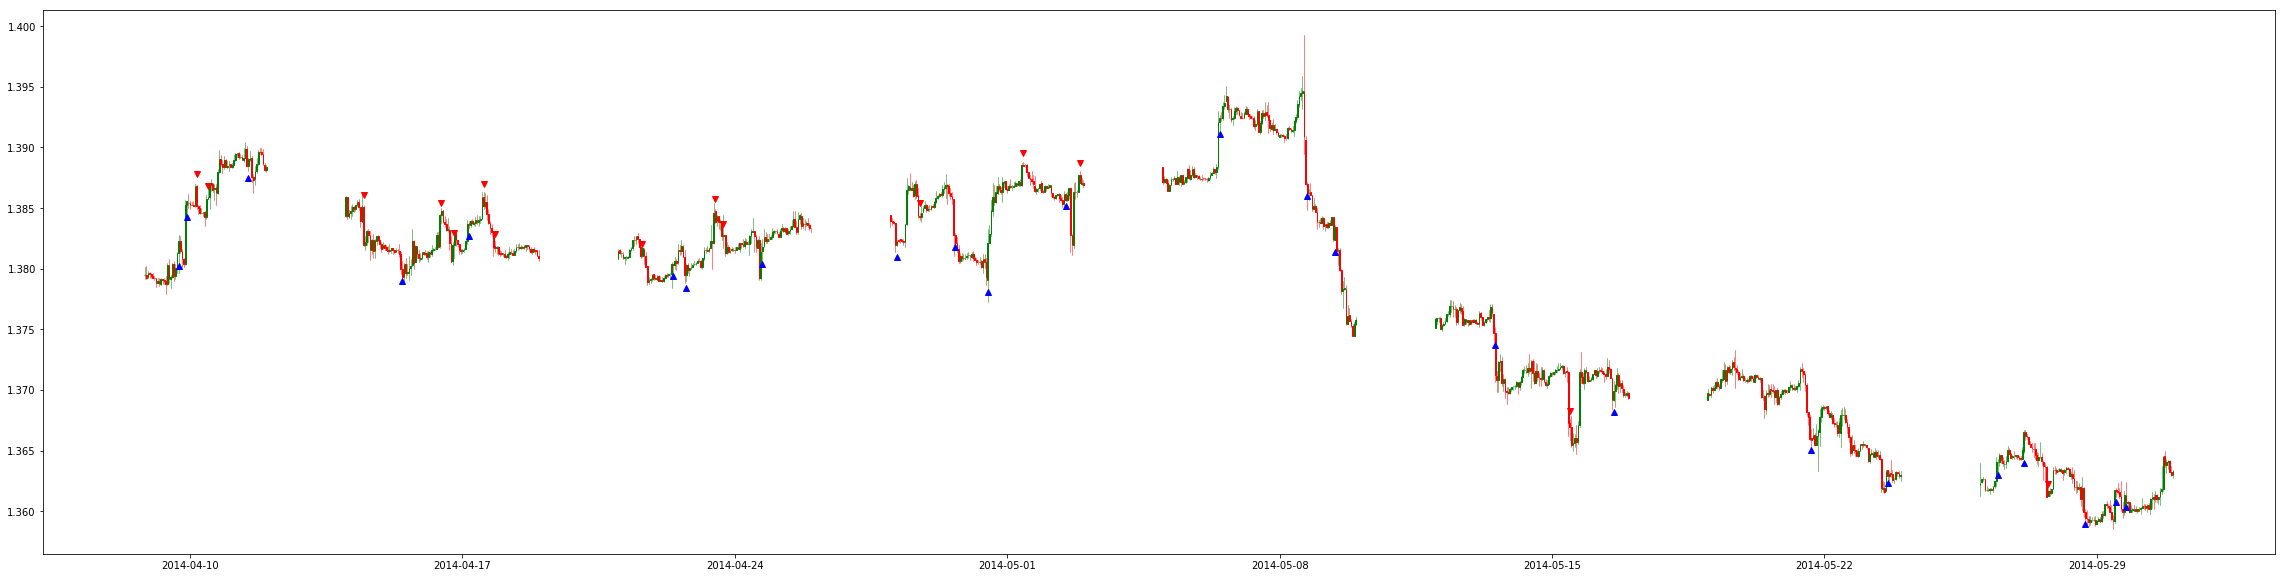

In [11]:
Q_learning._generate_summary_stats()

All trade entries are kept in env.portfolio.journal

In [12]:
env.portfolio.journal

[{'Entry Price': 1.3812599999999999,
  'Entry Time': Timestamp('2014-04-09 17:00:00'),
  'Exit Price': 1.3852799999999998,
  'Exit Time': Timestamp('2014-04-09 21:00:00'),
  'Profit': 37.199999999999122,
  'Trade Duration': 5,
  'Type': 'BUY'},
 {'Entry Price': 1.3852899999999999,
  'Entry Time': Timestamp('2014-04-09 22:00:00'),
  'Exit Price': 1.3851500000000001,
  'Exit Time': Timestamp('2014-04-10 02:00:00'),
  'Profit': -4.3999999999980695,
  'Trade Duration': 5,
  'Type': 'BUY'},
 {'Entry Price': 1.38679,
  'Entry Time': Timestamp('2014-04-10 04:00:00'),
  'Exit Price': 1.3847,
  'Exit Time': Timestamp('2014-04-10 08:00:00'),
  'Profit': 17.899999999999253,
  'Trade Duration': 5,
  'Type': 'SELL'},
 {'Entry Price': 1.38578,
  'Entry Time': Timestamp('2014-04-10 11:00:00'),
  'Exit Price': 1.3866799999999999,
  'Exit Time': Timestamp('2014-04-10 15:00:00'),
  'Profit': -11.999999999999009,
  'Trade Duration': 5,
  'Type': 'SELL'},
 {'Entry Price': 1.3885100000000001,
  'Entry Time